In [3]:
from pathlib2 import Path
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import re
import IPython
import librosa
import librosa.display
from tqdm.autonotebook import tqdm

/home/AD/tsainbur/anaconda3/envs/cdcp_paper_37/lib/python3.7/site-packages/ipykernel_launcher.py:9: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  if __name__ == '__main__':


In [1]:
import trimap

In [5]:
specs_flattened = np.load('specs_flattened.npy')

In [8]:
indvs = np.load('indv.npy', allow_pickle=True)

In [11]:
embedding_trimap = trimap.TRIMAP(
verbose=True
).fit_transform(specs_flattened)

TRIMAP(n_inliers=10, n_outliers=5, n_random=5, distance=euclidean, lr=1000.0, n_iters=400, weight_adj=500.0, apply_pca=True, opt_method=dbd, verbose=True, return_seq=False)
running TriMap on 7285 points with dimension 6720
pre-processing
applied PCA
found nearest neighbors
sampled triplets
running TriMap with dbd
Iteration:  100, Loss: 151.125, Violated triplets: 0.0377
Iteration:  200, Loss: 140.260, Violated triplets: 0.0350
Iteration:  300, Loss: 133.633, Violated triplets: 0.0334
Iteration:  400, Loss: 129.398, Violated triplets: 0.0323
Elapsed time: 0:00:17.964666


In [10]:
import seaborn as sns

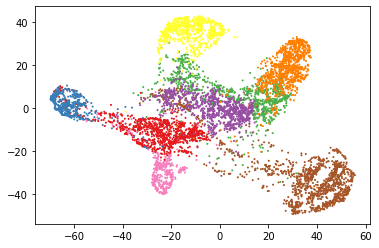

In [12]:
cat = indvs
pal = {i:j for i, j in zip(np.unique(cat), sns.color_palette('Set1', len(np.unique(cat))))}
cols = [pal[i] for i in cat]

plt.scatter(embedding_trimap[:,0], embedding_trimap[:,1], c = cols, s=1)

In [13]:
macaque_distance_matrix = np.load('macaque_distance_matrix.numpy.npy', allow_pickle=True)

In [14]:
embedding_dtw = trimap.TRIMAP(use_dist_matrix=True, verbose=True).fit_transform(macaque_distance_matrix)


TRIMAP(n_inliers=10, n_outliers=5, n_random=5, distance=pre-computed, lr=1000.0, n_iters=400, weight_adj=500.0, apply_pca=True, opt_method=dbd, verbose=True, return_seq=False)
running TriMap on 7285 points with dimension 7285
using distance matrix
running TriMap with dbd
Iteration:  100, Loss: 1527.051, Violated triplets: 0.3811
Iteration:  200, Loss: 1222.117, Violated triplets: 0.3050
Iteration:  300, Loss: 1076.967, Violated triplets: 0.2688
Iteration:  400, Loss: 1031.828, Violated triplets: 0.2575
Elapsed time: 0:00:15.795601


In [17]:
specs_padded = np.load('specs_padded.npy')

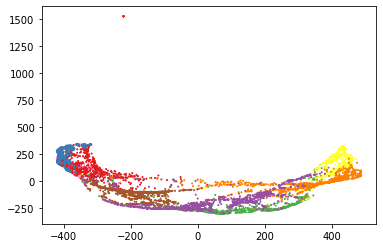

In [18]:
cat = indvs
pal = {i:j for i, j in zip(np.unique(cat), sns.color_palette('Set1', len(np.unique(cat))))}
cols = [pal[i] for i in cat]

plt.scatter(embedding_dtw[:,0], embedding_dtw[:,1], c = cols, s=1)

In [19]:
from projections import scatter_spec

In [22]:
def save_fig(
    loc, dpi=300, save_pdf=False, save_svg=False, save_png=False, save_jpg=True
):
    if save_pdf:
        plt.savefig(str(loc) + ".pdf", dpi=dpi, bbox_inches="tight", pad_inches=0)
    if save_svg:
        plt.savefig(
            str(loc) + ".svg",
            dpi=dpi,
            bbox_inches="tight",
            pad_inches=0,
            transparent=True,
        )
    if save_png:
        plt.savefig(
            str(loc) + ".png",
            dpi=dpi,
            bbox_inches="tight",
            pad_inches=0,
            transparent=True,
        )
    if save_jpg:
        plt.savefig(
            str(loc) + ".jpg", dpi=int(dpi / 2), bbox_inches="tight", pad_inches=0
        )

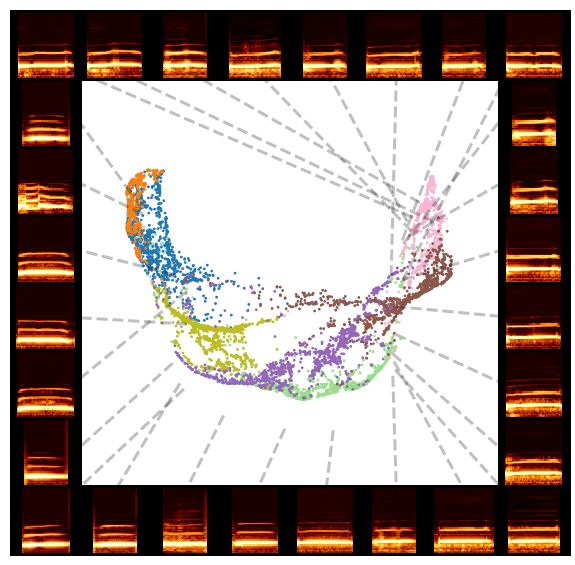

In [23]:
nex = -1
scatter_spec(
    embedding_dtw[:nex],
    specs_padded[:nex],
    column_size=8,
    #x_range = [-4.5,4],
    #y_range = [-4.5,5.5],
    pal_color="hls",
    color_points=False,
    enlarge_points=0,
    figsize=(10, 10),
    range_pad = 0.15,
    scatter_kwargs = {
        'labels': indvs[:nex],
        'alpha':1,
        's': 3,
        'show_legend': False
    },
    matshow_kwargs = {
        'cmap': plt.cm.afmhot
    },
    line_kwargs = {
        'lw':3,
        'ls':"dashed",
        'alpha':0.25,
    },
    draw_lines=True,
    n_subset= 1000,
    border_line_width = 3,

);
save_fig(Path('../figures') / 'trimap_dtw', dpi=300, save_jpg=True, save_png=True)

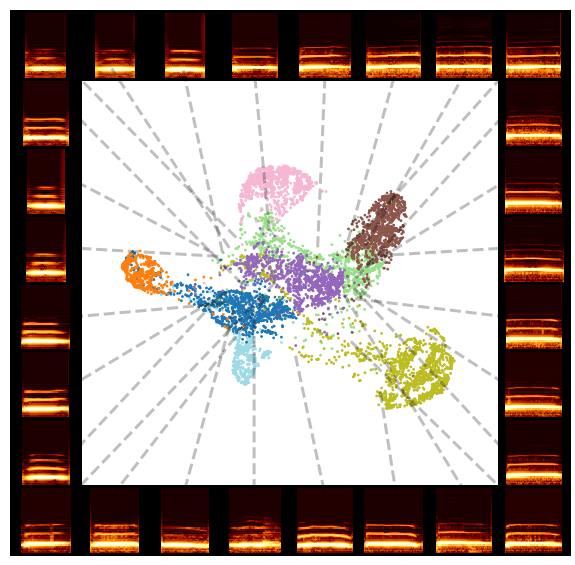

In [25]:
nex = -1
scatter_spec(
    embedding_trimap[:nex],
    specs_padded[:nex],
    column_size=8,
    #x_range = [-4.5,4],
    #y_range = [-4.5,5.5],
    pal_color="hls",
    color_points=False,
    enlarge_points=0,
    figsize=(10, 10),
    range_pad = 0.15,
    scatter_kwargs = {
        'labels': indvs[:nex],
        'alpha':1,
        's': 3,
        'show_legend': False
    },
    matshow_kwargs = {
        'cmap': plt.cm.afmhot
    },
    line_kwargs = {
        'lw':3,
        'ls':"dashed",
        'alpha':0.25,
    },
    draw_lines=True,
    n_subset= 1000,
    border_line_width = 3,

);
save_fig(Path('../figures') / 'trimap', dpi=300, save_jpg=True, save_png=True)